<a href="https://colab.research.google.com/github/lisaong/diec/blob/master/day4/rl/path_finding_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Path-Finding Demo

This demonstrates how to:
- Use OpenAI gym to create a custom environment
- Compare different Q-learning algorithms for Reinforcement Learning

Inspired by: http://mnemstudio.org/path-finding-q-learning-tutorial.htm

## Problem Setup

Bender is lost in Fry's house! Help Bender find Fry (who is in Room 5 waiting with a can of beer).

![intro](https://github.com/lisaong/diec/raw/rl_path_finding/day4/rl/path_finding_intro.png)

(Character credits: Futurama)

## OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) is an open-source Python toolkit for developing RL algorithms.

We will use OpenAI gym to re-create Fry's house, then run some reinforcement learning to find the path.

https://github.com/openai/gym/blob/master/docs/creating-environments.md


In [14]:
# gym is already built into Colab
import gym
from gym import spaces
import numpy as np
import random

gym.__version__

'0.15.6'

In [0]:
#
# A Simple Path Finding OpenAI Gym Environment
#
# Inspired by: http://mnemstudio.org/path-finding-q-learning-tutorial.htm
#

import gym
from gym import spaces
import numpy as np
import random

class FrysHomeEnv(gym.Env):
  """Custom Environment describing Fry's home  
  
  For details on the gym.Env class:
  https://github.com/openai/gym/blob/master/gym/core.py
  """

  # render to the current display or terminal
  metadata = {'render.modes': ['human']}

  def __init__(self, rewards):
    super(FrysHomeEnv, self).__init__()

    self.rewards = rewards
    self.num_rooms = self.rewards.shape[0]

    # Action space describes all possible actions that can be taken
    # here, we can select 1 out of 6 rooms
    self.action_space = spaces.Discrete(self.num_rooms)

    # Observation space describes the valid observations
    # since we are moving between rooms, we can be in 1 of 6 rooms
    self.observation_space = spaces.Discrete(self.num_rooms)

    # Rewards range describes the min and max possible rewards
    self.reward_range = (self.rewards.min(), self.rewards.max())

    # Room 5 is our goal
    self.goal = 5

    # Initialise our state
    self.reset()

  def reset(self):
    """Reset the environment to an initial state"""

    # Randomly initialise the state
    self.state = random.randint(0, self.num_rooms-1)

    # Return the observation (same as the state in our case)
    obs = self.state
    return obs

  def step(self, action):
    """Execute one step within the environment"""

    # take the selected action
    prev_state = self.state
    self.state = action

    # calculate the reward
    reward = self.rewards[prev_state][action]

    # check if we've reached our goal
    done = (prev_state == self.goal or self.state == self.goal)

    # get the next observation
    obs = self.state

    return obs, reward, done, {}

  def render(self, mode='human', close=True):
    """Print state of the current environment"""
    print(f'Current room: {self.state}, Reached goal: {self.state == self.goal}')

In [148]:
# Unit testing

# Initialise the rewards matrix for the rooms in the house
# Where:
#  state: current room, action: next room
#  dimensions (row=state, col=actions)
#  A value of -1 means there is no adjacent path from room_i to room_j
#  (for example, room_0 to room_0 has, room_0 to room_5)

R = np.array([[-1, -1, -1, -1,  0, -1 ],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1, -1 ], 
              [-1,  0,  0, -1,  0, -1 ],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]])

myenv = FrysHomeEnv(rewards=R)

for i in range(0, 6):
  print(myenv.step(i))
  myenv.render()

(0, -1, False, {})
Current room: 0, Reached goal: False
(1, -1, False, {})
Current room: 1, Reached goal: False
(2, -1, False, {})
Current room: 2, Reached goal: False
(3, 0, False, {})
Current room: 3, Reached goal: False
(4, 0, False, {})
Current room: 4, Reached goal: False
(5, 100, True, {})
Current room: 5, Reached goal: True


## Package custom environment as module

OpenAI gym requires all environments to be packaged as Python modules.

The code above has been packaged here:
https://github.com/lisaong/diec/blob/master/day4/rl/gym-fryshome

The module follows this convention:
https://github.com/openai/gym/blob/master/docs/creating-environments.md

In [11]:
!git clone -b rl_path_finding https://github.com/lisaong/diec.git
%cd diec/day4/rl/gym-fryshome
!git pull
!pip install --verbose -e  .

fatal: destination path 'diec' already exists and is not an empty directory.
/content/diec/day4/rl/gym-fryshome
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 17 (delta 11), reused 12 (delta 7), pack-reused 0
Unpacking objects: 100% (17/17), done.
From https://github.com/lisaong/diec
   f52e36d..b8d2558  rl_path_finding -> origin/rl_path_finding
Updating f52e36d..b8d2558
Fast-forward
 .../gym_fryshome/envs/frys_home_env.py             |  16 +-
 day4/rl/path_finding_demo.ipynb                    | 254 ++++++++++++---------
 2 files changed, 144 insertions(+), 126 deletions(-)
Created temporary directory: /tmp/pip-ephem-wheel-cache-39sk297y
Created temporary directory: /tmp/pip-req-tracker-w83an5vv
Created requirements tracker '/tmp/pip-req-tracker-w83an5vv'
Created temporary directory: /tmp/pip-install-883a0bjx
Obtaining file:///content/diec/day4/rl/gym-fryshome
  Added file:///content/d

## ** Restart the Colab kernel after every pip install**

Runtime -> Restart Runtime

In [2]:
# IMPORTANT: RESTART THE COLAB KERNEL if you've just run !pip install

# Test the installation
import gym_fryshome

gym_fryshome

<module 'gym_fryshome' from '/content/diec/day4/rl/gym-fryshome/gym_fryshome/__init__.py'>

## Random Walk Agent
 
The simplest way is to have Bender randomly walk around the house.
* We will run 20 episodes, where each episode is a maximum of 100 steps
* Refer to http://gym.openai.com/docs/

This doesn't actually learn anything, but is a good baseline for any RL agents.

In [0]:
class RandomAgent:
    """The world's simplest agent!
      https://github.com/openai/gym/blob/master/examples/agents/random_agent.py
    """
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

In [150]:
import gym
import numpy as np

# Constants
EPISODE_COUNT = 20
STEPS_PER_EPISODE = 100
R = np.array([[-1, -1, -1, -1,  0, -1 ],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1, -1 ], 
              [-1,  0,  0, -1,  0, -1 ],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]])
# Global state
done = False
reward = 0

# Create our environment (Fry's home), and our agent
env = gym.make('gym_fryshome:fryshome-v0', rewards=R)
bender_agent = RandomAgent(env.action_space)

for episode in range(EPISODE_COUNT):
  observation = env.reset()

  for t in range(STEPS_PER_EPISODE):
    env.render()
    
    # take a random action
    action = bender_agent.act(observation, reward, done)

    # step the environment using the selected action
    observation, reward, done, info = env.step(action)

    if done:
      print(f'Episode finished after {t+1} timesteps\n')
      done = False # reset for next episode
      break

env.close()

Current room: 0, Reached goal: False
Current room: 4, Reached goal: False
Current room: 0, Reached goal: False
Current room: 1, Reached goal: False
Episode finished after 4 timesteps

Current room: 2, Reached goal: False
Current room: 1, Reached goal: False
Episode finished after 2 timesteps

Current room: 2, Reached goal: False
Current room: 1, Reached goal: False
Current room: 3, Reached goal: False
Current room: 2, Reached goal: False
Episode finished after 4 timesteps

Current room: 5, Reached goal: True
Episode finished after 1 timesteps

Current room: 2, Reached goal: False
Current room: 1, Reached goal: False
Current room: 3, Reached goal: False
Episode finished after 3 timesteps

Current room: 1, Reached goal: False
Current room: 4, Reached goal: False
Current room: 4, Reached goal: False
Episode finished after 3 timesteps

Current room: 3, Reached goal: False
Episode finished after 1 timesteps

Current room: 4, Reached goal: False
Current room: 0, Reached goal: False
Current r

## Q-Learning Agent

Let's implement the basic Q-Learning formula (without Temporal Differencing):

`Q(state, action) = R(state, action) + gamma * max[Q(next_state, all actions)]`

Our Q-Learning agent will store the Q-values as we go along. This can be thought of as Benders "brain"!

In [0]:
import numpy as np
import random
from gym import spaces

class QLearningAgent:
  """Basic Q-Learning Agent"""
  def __init__(self, rewards, gamma=0.8, verbose=False):
    """rewards: the rewards matrix
    gamma: the discount factor in considering future rewards
    """
    self.rewards = rewards

    # Initialise the Q-matrix to zeros:
    # dimensions (row=state, cols=actions)
    self.Q = np.zeros(rewards.shape)

    self.gamma = gamma
    self.verbose = verbose

  def _get_valid_actions(self, observation):
    actions = np.arange(self.rewards.shape[1])
    return actions[self.rewards[observation] != -1]

  def act(self, observation, reward, done):
    """Update the Q-matrix, then take an action
    observation: current state
    reward: reward from the previous action (unused)
    done: whether the episode is completed
    """
    state = observation
    if done:
      return state # no change, we are done

    # randomly select the next action/observation
    valid_actions = self._get_valid_actions(state)
    action = np.random.choice(valid_actions)
    next_observation = action

    # find the maximum Q-value for all future actions
    all_actions = self._get_valid_actions(next_observation)
    future_rewards = self.Q[next_observation][all_actions]

    print(f'Action: {action}, next state: {next_observation}, \
all actions: {all_actions}, all future rewards: {future_rewards}, \
max future reward: {future_rewards.max():.3f}')

    # update the Q matrix
    # Q(state, action) = R(state, action) + gamma * max[Q(next state, all actions)]
    self.Q[state][action] = self.rewards[state][action] + \
      self.gamma * future_rewards.max()

    if self.verbose:
      print(f'Q-values:\n{self.Q}')

    return action

  def best_path(self, initial_state, goal=5):
    """Returns the best path starting from a given state"""
    path = [initial_state]
    state = initial_state

    while(True):
      state = self.Q[state].argmax()
      path.append(state)
      if state == goal:
        break
      
    return path          

In [271]:
# Unit Test
test_agent = QLearningAgent(rewards=R, verbose=True)
action = test_agent.act(1, 0, False)

Action: 3, next state: 3, all actions: [1 2 4], all future rewards: [0. 0. 0.], max future reward: 0.000
Q-values:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Put our agent to work. Hopefully Bender is now smarter.

In [273]:
# Global state
EPISODE_COUNT = 100
STEPS_PER_EPISODE = 20
done = False
reward = 0

# Track how many timesteps it took to finish
history = {start:[] for start in range(R.shape[0])}

# Create our environment (Fry's home), and our new agent
env = gym.make('gym_fryshome:fryshome-v0', rewards=R)
bender_v2 = QLearningAgent(rewards=R)

for episode in range(EPISODE_COUNT):
  observation = env.reset()
  start = observation

  for t in range(STEPS_PER_EPISODE):
    env.render()
    
    # take the next action
    action = bender_v2.act(observation, reward, done)

    # step the environment using the selected action
    observation, reward, done, info = env.step(action)

    if done:
      print(f'Episode finished after {t+1} timesteps\n')
      history[start].append(t+1)
      done = False # reset for next episode
      break

env.close()

Current room: 3, Reached goal: False
Action: 1, next state: 1, all actions: [3 5], all future rewards: [0. 0.], max future reward: 0.000
Current room: 1, Reached goal: False
Action: 3, next state: 3, all actions: [1 2 4], all future rewards: [0. 0. 0.], max future reward: 0.000
Current room: 3, Reached goal: False
Action: 4, next state: 4, all actions: [0 3 5], all future rewards: [0. 0. 0.], max future reward: 0.000
Current room: 4, Reached goal: False
Action: 0, next state: 0, all actions: [4], all future rewards: [0.], max future reward: 0.000
Current room: 0, Reached goal: False
Action: 4, next state: 4, all actions: [0 3 5], all future rewards: [0. 0. 0.], max future reward: 0.000
Current room: 4, Reached goal: False
Action: 5, next state: 5, all actions: [1 4 5], all future rewards: [0. 0. 0.], max future reward: 0.000
Episode finished after 6 timesteps

Current room: 5, Reached goal: True
Action: 1, next state: 1, all actions: [3 5], all future rewards: [0. 0.], max future rewar

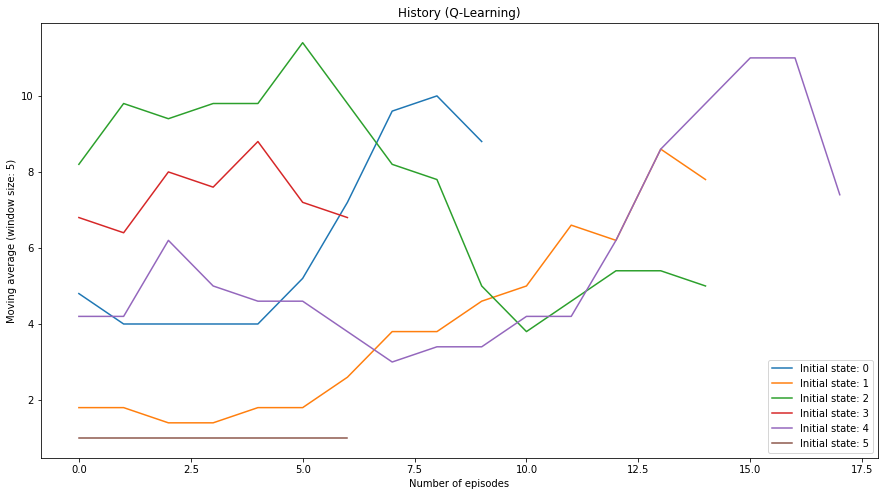

In [291]:
# plot the history as a moving average
import matplotlib.pyplot as plt

def plot_history(history, title):
  def moving_average(a, n):
    # https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

  fig, ax = plt.subplots(figsize=(15, 8))

  window_size = min(EPISODE_COUNT//10, 5)
  for start, ts in history.items():
    ax.plot(moving_average(ts, window_size), label=f'Initial state: {start}')

  ax.set_title(title)
  ax.set_xlabel(f'Number of episodes')
  ax.set_ylabel(f'Moving average (window size: {window_size})')

  ax.legend()
  plt.show()

plot_history(history, title='History (Q-Learning)')

In [276]:
bender_v2.Q

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        227.951616  ,   0.        ],
       [  0.        ,   0.        ,   0.        , 182.3612928 ,
          0.        , 284.93952   ],
       [  0.        ,   0.        ,   0.        , 182.3612928 ,
          0.        ,   0.        ],
       [  0.        , 227.951616  , 145.88903424,   0.        ,
        227.951616  ,   0.        ],
       [182.3612928 ,   0.        ,   0.        , 182.3612928 ,
          0.        , 284.93952   ],
       [  0.        , 227.951616  ,   0.        ,   0.        ,
        227.951616  , 231.1744    ]])

Now Bender can find the best path to beer from any room!

In [277]:
room_with_beer = 5
for initial_state in range(room_with_beer+1):
  print(bender_v2.best_path(initial_state))

[0, 4, 5]
[1, 5]
[2, 3, 1, 5]
[3, 1, 5]
[4, 5]
[5, 5]


## Q-Learning Agent with TD

A small improvement for the Q-Learning Agent is to add Temporal Differencing.  

Strictly speaking, TD is not necessary for this case because all the states and actions are known.

![equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/678cb558a9d59c33ef4810c9618baf34a9577686)

Source: https://en.wikipedia.org/wiki/Q-learning


In [0]:
class QLearningTDAgent(QLearningAgent):
  """Q-Learning Agent with Temporal Differencing"""
  def __init__(self, rewards, gamma=0.8, alpha=0.1, verbose=False):
    """rewards: the rewards matrix
    gamma: the discount factor in considering future rewards
    alpha: how much prior knowledge to include
    """
    super(QLearningTDAgent, self).__init__(rewards, gamma, verbose)
    self.alpha = alpha

  def act(self, observation, reward, done):
    """Update the Q-matrix, then take an action
    observation: current state
    reward: reward from the previous action (unused)
    done: whether the episode is completed
    """
    state = observation
    if done:
      return state # no change, we are done

    # randomly select the next action/observation
    valid_actions = self._get_valid_actions(state)
    action = np.random.choice(valid_actions)
    next_observation = action

    # find the maximum Q-value for all future actions
    all_actions = self._get_valid_actions(next_observation)
    future_rewards = self.Q[next_observation][all_actions]

    print(f'Action: {action}, next state: {next_observation}, \
all actions: {all_actions}, all future rewards: {future_rewards}, \
max future reward: {future_rewards.max():.3f}')

    # update the Q matrix
    # this is where temporal difference is applied
    old_value = self.Q[state][action]
    self.Q[state][action] = old_value + \
      self.alpha * (self.rewards[state][action] + \
                    self.gamma * future_rewards.max() - old_value)

    if self.verbose:
      print(f'Q-values:\n{self.Q}')

    return action

In [293]:
# Global state
EPISODE_COUNT = 100
STEPS_PER_EPISODE = 20
done = False
reward = 0

# Track how many timesteps it took to finish
history_v3 = {start:[] for start in range(R.shape[0])}

env = gym.make('gym_fryshome:fryshome-v0', rewards=R)
bender_v3 = QLearningTDAgent(rewards=R)

for episode in range(EPISODE_COUNT):
  observation = env.reset()
  start = observation

  for t in range(STEPS_PER_EPISODE):
    env.render()
    
    # take the next action
    action = bender_v3.act(observation, reward, done)

    # step the environment using the selected action
    observation, reward, done, info = env.step(action)

    if done:
      print(f'Episode finished after {t+1} timesteps\n')
      history_v3[start].append(t+1)
      done = False # reset for next episode
      break

env.close()

Current room: 5, Reached goal: True
Action: 5, next state: 5, all actions: [1 4 5], all future rewards: [0. 0. 0.], max future reward: 0.000
Episode finished after 1 timesteps

Current room: 3, Reached goal: False
Action: 1, next state: 1, all actions: [3 5], all future rewards: [0. 0.], max future reward: 0.000
Current room: 1, Reached goal: False
Action: 3, next state: 3, all actions: [1 2 4], all future rewards: [0. 0. 0.], max future reward: 0.000
Current room: 3, Reached goal: False
Action: 1, next state: 1, all actions: [3 5], all future rewards: [0. 0.], max future reward: 0.000
Current room: 1, Reached goal: False
Action: 3, next state: 3, all actions: [1 2 4], all future rewards: [0. 0. 0.], max future reward: 0.000
Current room: 3, Reached goal: False
Action: 4, next state: 4, all actions: [0 3 5], all future rewards: [0. 0. 0.], max future reward: 0.000
Current room: 4, Reached goal: False
Action: 3, next state: 3, all actions: [1 2 4], all future rewards: [0. 0. 0.], max fu

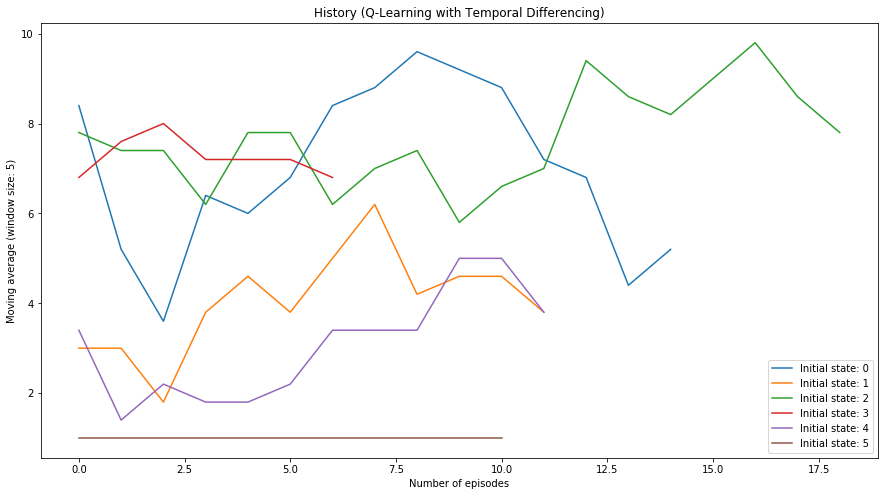

In [294]:
plot_history(history_v3, 'History (Q-Learning with Temporal Differencing)')

In [284]:
bender_v3.Q

array([[  0.        ,   0.        ,   0.        ,   0.        ,
         74.12104477,   0.        ],
       [  0.        ,   0.        ,   0.        ,  18.88846985,
          0.        ,  93.2191766 ],
       [  0.        ,   0.        ,   0.        ,  32.47637298,
          0.        ,   0.        ],
       [  0.        ,  49.50584785,  12.50041429,   0.        ,
         62.76692397,   0.        ],
       [ 41.1249026 ,   0.        ,   0.        ,  26.9054169 ,
          0.        , 104.78431874],
       [  0.        ,   1.52      ,   0.        ,   0.        ,
         20.64895994,  21.25234178]])

Convergence seems quicker compared to Basic Q-Learning, as noticed by the smaller moving averages. 

Bender V3 learnt a bit quicker than Bender V2.

In [296]:
room_with_beer = 5
for initial_state in range(room_with_beer+1):
  print(bender_v3.best_path(initial_state))

[0, 4, 5]
[1, 5]
[2, 3, 4, 5]
[3, 4, 5]
[4, 5]
[5, 5]


## More Advanced Agents

You can install baselines, which contain implementation of more sophisticated agents.

https://github.com/openai/baselines